<a href="https://colab.research.google.com/github/krispiekris/WDDProject/blob/master/Project_Flight_Simulator(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### University of West Attica
## MSc in Artificial Intelligence & Deep Learning

# AIDL-B-CS02 Artificial Intelligence in Healthcare and Biometrics 
# Project: Flight Simulator


### Christos Panagiotopoulos mscaidl-0027
### Eleni Feleskoura mscaidl-0036

<br>
<br>

## Import necessary libraries

In [1]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pandas._libs.hashtable import mode

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.manifold import TSNE
import seaborn as sns
from numba import jit
import scipy
import statistics
from utils import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [4]:
# Define path to the folders
vr01_path = '/content/drive/MyDrive/VR01'
vr03_path = '/content/drive/MyDrive/VR03'

In [5]:
# Load VR01 data into separate dataframes
vr01_dataframes = []
for filename in os.listdir(vr01_path):
  if filename.endswith(".txt"):
    filepath = os.path.join(vr01_path, filename)
    df = pd.read_csv(filepath, delimiter='\t', skiprows=1, index_col=0, header=None)
    vr01_dataframes.append(df)

In [ ]:
# Check the shape of each dataframe in vr01_dataframes
for df in vr01_dataframes:
    print(df.shape)

(62, 63168)
(62, 62945)
(62, 63051)
(62, 60033)
(62, 60929)
(62, 57537)
(62, 63223)
(62, 63047)
(62, 57857)
(62, 61121)
(62, 57729)
(62, 59521)
(62, 51393)
(62, 60353)
(62, 60097)
(62, 53249)
(62, 54273)
(62, 55233)
(62, 58305)
(62, 56065)
(62, 59201)
(62, 55617)
(62, 55425)
(62, 59073)
(62, 61249)
(62, 59521)
(62, 56833)
(62, 58753)
(62, 54785)
(62, 55681)
(62, 52609)
(62, 60673)
(62, 51777)


In [ ]:
vr01_dataframes[0].shape


(62, 63168)

In [ ]:
print(vr01_dataframes)

[      1       2        3        4        5       6       7        8      \
0                                                                         
FP1 -0.2670 -4.3724  -8.0704 -10.4025 -10.8719 -9.5300 -6.9260  -3.9452   
FPz  1.4930 -1.6976  -4.2091  -5.1619  -4.7226 -3.8955 -3.7240  -4.5328   
FP2  3.6648  5.9937   8.1604   8.9112   7.2056  2.9934 -2.4625  -7.0780   
F7  -0.9643 -0.6166  -0.8894  -1.9675  -3.3361 -4.0296 -3.3538  -1.5235   
F3   1.8028  0.9799  -0.3362  -1.9986  -3.3761 -3.5852 -2.0709   0.8564   
..      ...     ...      ...      ...      ...     ...     ...      ...   
FT8 -0.7281 -1.5996  -1.4609  -0.3250   0.8956  0.9601 -0.7798  -3.7773   
TP7 -0.3301  6.9143  13.2940  14.8480   9.8922  0.4683 -8.7424 -13.3602   
TP8 -0.5273 -1.0192  -0.8500  -0.0231   0.8144  0.7787 -0.5751  -2.8078   
PO7  2.6309  3.6605   3.5363   2.3047   0.8271  0.1488  0.6804   1.8109   
PO8  0.5518 -0.3722  -0.7995  -0.5095   0.1050  0.2876 -0.5028  -2.1103   

       9       10     .

In [ ]:
for df in vr01_dataframes:
    print(df.head())

      1       2       3        4        5       6       7       8       9      \
0                                                                               
FP1 -0.2670 -4.3724 -8.0704 -10.4025 -10.8719 -9.5300 -6.9260 -3.9452 -1.5956   
FPz  1.4930 -1.6976 -4.2091  -5.1619  -4.7226 -3.8955 -3.7240 -4.5328 -5.7298   
FP2  3.6648  5.9937  8.1604   8.9112   7.2056  2.9934 -2.4625 -7.0780 -9.0011   
F7  -0.9643 -0.6166 -0.8894  -1.9675  -3.3361 -4.0296 -3.3538 -1.5235  0.3223   
F3   1.8028  0.9799 -0.3362  -1.9986  -3.3761 -3.5852 -2.0709  0.8564  3.9530   

      10     ...   63159   63160   63161   63162   63163   63164   63165  \
0            ...                                                           
FP1 -0.6713  ...  3.2823  2.4983  1.1693 -0.4744 -1.7985 -2.2418 -1.8421   
FPz -6.3637  ...  0.5862  2.2752  2.9922  2.6581  1.9507  1.5925  1.6648   
FP2 -7.6702  ... -1.6489 -0.5199 -1.5340 -2.8156 -2.5871 -0.4959  2.3136   
F7   0.8389  ...  7.4615  6.9136  4.0632 -0.1829 -4.

In [ ]:
for df in vr01_dataframes:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 63168 entries, 1 to 63168
dtypes: float64(63168)
memory usage: 29.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 62945 entries, 1 to 62945
dtypes: float64(62945)
memory usage: 29.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 63051 entries, 1 to 63051
dtypes: float64(63051)
memory usage: 29.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 60033 entries, 1 to 60033
dtypes: float64(60033)
memory usage: 28.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 60929 entries, 1 to 60929
dtypes: float64(60929)
memory usage: 28.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns: 57537 entries, 1 to 57537
dtypes: float64(57537)
memory usage: 27.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, FP1 to PO8
Columns:

In [ ]:
print(vr01_dataframes[0].columns)


Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            63159, 63160, 63161, 63162, 63163, 63164, 63165, 63166, 63167,
            63168],
           dtype='int64', length=63168)


In [6]:
# Load VR03 data into separate dataframes
vr03_dataframes = []
for filename in os.listdir(vr03_path):
  if filename.endswith(".txt"):
    filepath = os.path.join(vr03_path, filename)
    df = pd.read_csv(filepath, delimiter='\t', skiprows=1, index_col=0, header=None)
    vr03_dataframes.append(df)

In [ ]:
# Check the shape of each dataframe in vr03_dataframes
for df in vr03_dataframes:
    print(df.shape)


(62, 62862)
(62, 62907)
(62, 63045)
(62, 61249)
(62, 60225)
(62, 61185)
(62, 62948)
(62, 63024)
(62, 60673)
(62, 60417)
(62, 59905)
(62, 60161)
(62, 60481)
(62, 61249)
(62, 61185)
(62, 59521)
(62, 60161)
(62, 59393)
(62, 58433)
(62, 61121)
(62, 59201)
(62, 57537)
(62, 60993)
(62, 59777)
(62, 61249)
(62, 59265)
(62, 58113)
(62, 60481)
(62, 56513)
(62, 60353)
(62, 61185)
(62, 61249)
(62, 53761)


In [ ]:
print(vr03_dataframes[0].columns)


Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            62853, 62854, 62855, 62856, 62857, 62858, 62859, 62860, 62861,
            62862],
           dtype='int64', length=62862)


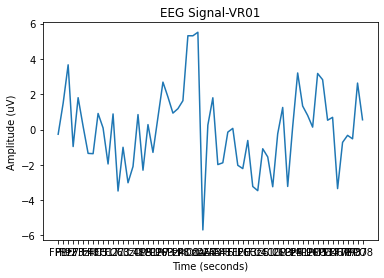

In [ ]:
# visualizing the raw data

# Get the first data frame in vr01_dataframes
df = vr01_dataframes[0]

# Plot the first 500 samples of the first column
plt.plot(df.iloc[:500, 0])
# Add labels and title to the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Signal-VR01')

plt.show()

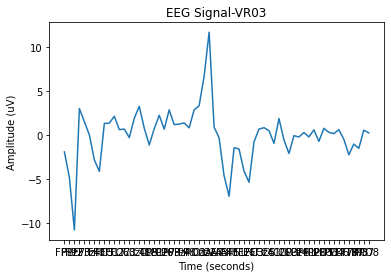

In [ ]:
# Get the first data frame in vr01_dataframes
df = vr03_dataframes[0]

# Plot the first 500 samples of the first column
plt.plot(df.iloc[:500, 0])
# Add labels and title to the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG Signal-VR03')
plt.show()

## Feature Extraction (Time-domain features) 

In [ ]:
# https://github.com/vishaln15/pysigpro/tree/main/pysigpro/eeg

In [7]:
def get_time_domain_features(x: list) -> dict:

    assert x is not None, "Invalid signal provided"

    x = np.asarray(x)
    mean = np.mean(x)
    stddev = np.std(x)
    kurtosis = scipy.stats.kurtosis(x)
    skewness = scipy.stats.skew(x)
    variance = np.var(x)
    mode = statistics.mode(x)
    median = statistics.median(x)
    minimum = min(x)
    maximum = max(x)
    coefficient_of_variation = np.std(x) / np.mean(x)
    sqr = x**2
    energy = sum(sqr)
    avg_power = np.mean(sqr)
    rms = np.sqrt(avg_power)
    hjorthActivity = variance
    hjorthMobility = np.sqrt(np.var(np.gradient(x)) / np.var(x))   
    hjorthComplexity =np.sqrt(np.var(np.gradient(x)) / np.var(np.gradient(x) / hjorthMobility))



    line_length = sum([abs(x[i] - x[i-1]) for i in range(1, len(x))])
    non_linear_energy = sum([(x[i])**2 - x[i+1]*x[i-1] for i in range(1, len(x)-1)])

    time_domain_features = {
        'mean' : mean,
        'stddev' : stddev,
        'kurtosis' : kurtosis,
        'skewness' : skewness,
        'variance' : variance,
        'mode' : mode,
        'median' : median,
        'minimum' : minimum,
        'maximum' : maximum,
        'energy' : energy,
        'average_power' : avg_power,
        'rms' : rms,
        'hjorthActivity' : hjorthActivity,
        'hjorthMobility' : hjorthMobility,
        'hjorthComplexity' : hjorthComplexity,
        'line_length' : line_length,
        'non_linear_energy' : non_linear_energy,
    }

    return time_domain_features

In [8]:
# Call the function on each signal and append the resulting features to a list
features = []
classes = []

for df in vr01_dataframes:
    signal = df[1].tolist()  # Extract the signal from the dataframe
    signal_features = get_time_domain_features(signal)
    features.append(signal_features)
    classes.append(0)

for df in vr03_dataframes:
    signal = df[1].tolist()  # Extract the signal from the dataframe
    signal_features = get_time_domain_features(signal)
    features.append(signal_features)
    classes.append(1)

# Create a Pandas DataFrame from the list of features
feature_matrix = pd.DataFrame(features)

# Add a new column to the DataFrame for the class labels
feature_matrix["class"] = classes

In [ ]:
print (feature_matrix.columns[:-1])

Index(['mean', 'stddev', 'kurtosis', 'skewness', 'variance', 'mode', 'median',
       'minimum', 'maximum', 'energy', 'average_power', 'rms',
       'hjorthActivity', 'hjorthMobility', 'hjorthComplexity', 'line_length',
       'non_linear_energy'],
      dtype='object')


In [ ]:
feature_matrix.shape

(66, 18)

In [ ]:
feature_matrix.head(2)

,mean,stddev,kurtosis,skewness,variance,mode,median,minimum,maximum,energy,average_power,rms,hjorthActivity,hjorthMobility,hjorthComplexity,line_length,non_linear_energy,class
0,-0.000023,2.265328,0.148472,0.229913,5.131712,-0.2670,0.11225,-5.6867,5.5100,318.166131,5.131712,2.265328,5.131712,0.666449,0.666449,125.3636,272.190237,0
1,-0.000032,3.674261,-0.418743,-0.130450,13.500191,1.5107,-0.40620,-9.8922,7.0619,837.011815,13.500191,3.674261,13.500191,0.552894,0.552894,160.0305,508.775444,0


In [ ]:
print(feature_matrix.describe())


               mean     stddev   kurtosis   skewness    variance       mode  \
count  6.600000e+01  66.000000  66.000000  66.000000   66.000000  66.000000   
mean  -4.105572e-06   4.754210   3.384996  -0.065834   45.643153  -0.562091   
std    1.969548e-05   4.836849   6.522148   1.455720  111.103280   6.810600   
min   -1.258065e-04   0.875576  -0.959450  -6.156272    0.766633 -13.625100   
25%   -4.838710e-06   2.010432  -0.060337  -0.790504    4.042392  -3.353725   
50%   -1.647428e-16   2.908818   1.298922   0.015310    8.461227  -0.970300   
75%    1.612903e-06   5.014924   4.190692   0.638161   25.169026   0.994275   
max    2.096774e-05  26.124916  42.609494   3.888214  682.511233  26.822900   

          median     minimum    maximum        energy  average_power  \
count  66.000000   66.000000  66.000000     66.000000      66.000000   
mean    0.038910  -14.716539  12.685277   2829.875500      45.643153   
std     1.200317   23.342061  12.619923   6888.403387     111.103280   


In [ ]:
print("Number of NaN values:", np.isnan(feature_matrix).sum())
print("Number of infinite values:", np.isinf(feature_matrix).sum())


Number of NaN values: mean                 0
stddev               0
kurtosis             0
skewness             0
variance             0
mode                 0
median               0
minimum              0
maximum              0
energy               0
average_power        0
rms                  0
hjorthActivity       0
hjorthMobility       0
hjorthComplexity     0
line_length          0
non_linear_energy    0
class                0
dtype: int64
Number of infinite values: mean                 0
stddev               0
kurtosis             0
skewness             0
variance             0
mode                 0
median               0
minimum              0
maximum              0
energy               0
average_power        0
rms                  0
hjorthActivity       0
hjorthMobility       0
hjorthComplexity     0
line_length          0
non_linear_energy    0
class                0
dtype: int64


## Feature Selection - Recursive feature elimination (RFE)

In [9]:
# To use RFE, we need to first split our data into input features and output variable. 
X = feature_matrix.iloc[:, :-1]  # input features
y = feature_matrix.iloc[:, -1]   # output variable


In [10]:
# Next, we can create an instance of the SVM model and the RFE class.

# using the linear kernel for the SVM model
svm = SVC(kernel='linear')

# select the top 10 features
rfe = RFE(svm, n_features_to_select=10)


In [11]:
# fit the RFE model on our data and get the selected features.
rfe.fit(X, y)
# pandas Index object containing the names of the selected features
selected_features = X.columns[rfe.support_]


In [ ]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))


Num Features: 10
Selected Features: [False  True  True  True False False  True  True  True False False  True
 False  True  True  True False]
Feature Ranking: [5 1 1 1 6 2 1 1 1 4 7 1 8 1 1 1 3]


In [ ]:
print("Time-domain features before RFE: %s" %  (feature_matrix.columns[:-1]))
print("Selected Features are: %s" % (selected_features))

Time-domain features before RFE: Index(['mean', 'stddev', 'kurtosis', 'skewness', 'variance', 'mode', 'median',
       'minimum', 'maximum', 'energy', 'average_power', 'rms',
       'hjorthActivity', 'hjorthMobility', 'hjorthComplexity', 'line_length',
       'non_linear_energy'],
      dtype='object')
Selected Features are: Index(['stddev', 'kurtosis', 'skewness', 'median', 'minimum', 'maximum', 'rms',
       'hjorthMobility', 'hjorthComplexity', 'line_length'],
      dtype='object')


In [12]:
# TSNE visualization

model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(feature_matrix)
tsne_data=np.vstack((tsne_data.T,y)).T


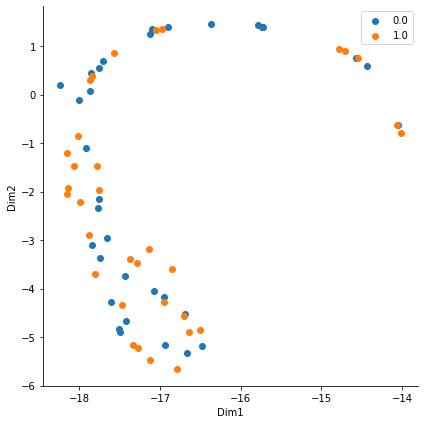

In [13]:
tsne_df=pd.DataFrame(data=tsne_data,columns=['Dim1','Dim2','labels'])
sns.FacetGrid(tsne_df,height=6,hue='labels').map(plt.scatter,'Dim1','Dim2')
plt.legend()

plt.show()


## Split Dataset

In [14]:
# train your machine learning models
X_selected = X[selected_features]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=True, random_state=42)

# X[selected_features] is the feature matrix containing only the selected features, y is the target vector

# Classification algorithms
## Model Training & Model Evaluation (accuracy score)

In [16]:

list_met =[]
list_accuracy =[]

#applying all the algorithms

#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression (C =0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit (X_train, y_train)
#prediction
y_pred = classifier.predict (X_test)
#Accuracy
accuracy_LR = accuracy_score (y_test, y_pred)


#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier2 =DecisionTreeClassifier(random_state=14)  # criterion = entropy or gini (try it!)
dt = classifier2.fit(X_train, y_train)
#Prediction
y_pred2=classifier2.predict(X_test)
#Accuracy
accuracy_DT =accuracy_score(y_test, y_pred2)


# Apply RandomForest criterion - information gain
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier (random_state= 14)
rfi= classifier3.fit(X_train,y_train)
#prediction
y_pred3 = classifier3.predict (X_test)
#Accuracy
accuracy_RFI = accuracy_score (y_test, y_pred3)


# Apply RandomForest criterion - entropy
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier (criterion='entropy')
rfe= classifier4.fit(X_train,y_train)
#prediction
y_pred4 = classifier4.predict (X_test)
#Accuracy
accuracy_RFE = accuracy_score (y_test, y_pred4)


# Apply SVM
from sklearn.svm import SVC
model_svm = SVC (cache_size=100)
svm = model_svm.fit (X_train, y_train)
#prediction
y_pred5 = model_svm.predict(X_test)
#accuracy
accuracy_SVM = accuracy_score (y_test, y_pred5)


# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier (n_neighbors=3)
knn = model_knn3.fit (X_train, y_train)
#Predicting test set N= 3
pred_knn3 = model_knn3.predict (X_test)
#Accuracy
accuracy_KNN = accuracy_score(y_test, pred_knn3)




In [47]:
#Combining all the above using vote classifier

evc = VotingClassifier(estimators=[ ('lr' , lr), ('rfi', rfi), ('rfe', rfe), ('DT', dt), ('svm', svm), ('knn', knn)], voting= 'hard',
                       flatten_transform= True)
model_evc= evc.fit(X_train, y_train)
#predicting test set
pred_evc = evc.predict (X_test)
#accuracy
accuracy_evc = accuracy_score(y_test,pred_evc)

#Visualize Barchart

list1 = ['logistic regression', 'Decision tree', 'Random forest_info gain ', 'Random forest_entropy', 'SVM','KNN','Voting']

list2 = [accuracy_LR,accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_SVM,accuracy_KNN, accuracy_evc]

list3 = [classifier, classifier2, classifier3, classifier4, model_svm, model_knn3, model_evc]

df_Accuracy= pd.DataFrame({'Method used': list1, 'Accuracy': list2})
print (df_Accuracy)

                Method used  Accuracy
0       logistic regression      0.45
1             Decision tree      0.50
2  Random forest_info gain       0.45
3     Random forest_entropy      0.55
4                       SVM      0.30
5                       KNN      0.35
6                    Voting      0.50


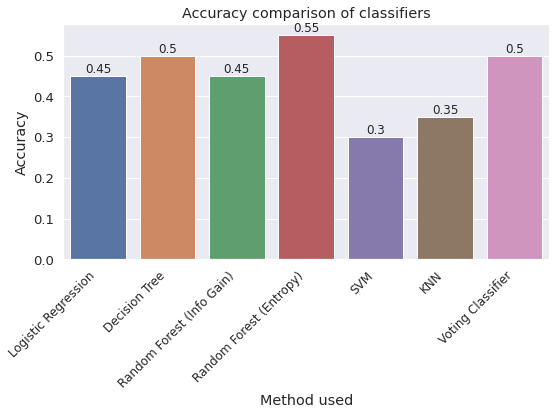

In [45]:
list1 = ['Logistic Regression', 'Decision Tree', 'Random Forest (Info Gain)', 'Random Forest (Entropy)', 'SVM', 'KNN', 'Voting Classifier']
list2 = [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_SVM, accuracy_KNN, accuracy_evc]
df_Accuracy = pd.DataFrame({'Method used': list1, 'Accuracy': list2})

# create bar chart
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
chart = sns.barplot(x='Method used', y='Accuracy', data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)
chart.set(ylabel='Accuracy')
chart.set(title='Accuracy comparison of classifiers')
for i in range(len(list1)):
    chart.text(i, df_Accuracy['Accuracy'][i], round(df_Accuracy['Accuracy'][i], 3), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Optimization and tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Define the parameter grids for each classifier

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],

}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],

}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],

}

svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],

}

knn_param_grid = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],

}

# Create the classifier objects

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()

# Create a list of classifier objects and their corresponding parameter grids

classifiers = [(lr, lr_param_grid), (dt, dt_param_grid), (rf, rf_param_grid), (svm, svm_param_grid), (knn, knn_param_grid)]
 

# Apply grid search to each classifier
results = []
for classifier, param_grid in classifiers:
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    results.append((classifier.__class__.__name__, grid_search.best_score_))
    print(f"Best parameters for {classifier.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best accuracy for {classifier.__class__.__name__}: {grid_search.best_score_}")

Best parameters for LogisticRegression: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Best accuracy for LogisticRegression: 0.7
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Best accuracy for DecisionTreeClassifier: 0.5644444444444444
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy for RandomForestClassifier: 0.5044444444444445
Best parameters for SVC: {'C': 0.01, 'kernel': 'linear'}
Best accuracy for SVC: 0.7022222222222222
Best parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
Best accuracy for KNeighborsClassifier: 0.4644444444444444


In [ ]:

# Create a dataframe with accuracy scores and classifier names
list1 = ['logistic regression', 'Decision tree', 'Random forest_info gain', 'Random forest_entropy', 'SVM', 'KNN', 'vote']
list2 = [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_SVM, accuracy_KNN]
list3 = [classifier, classifier2, classifier3, classifier4, model_svm, model_knn3]
df_accuracy = pd.DataFrame({'Method used': list1, 'Accuracy': list2, 'Classifier': list3})

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Method used', y='Accuracy', data=df_accuracy, hue='Classifier')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Accuracy Scores after Grid Search', fontsize=16)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.show()

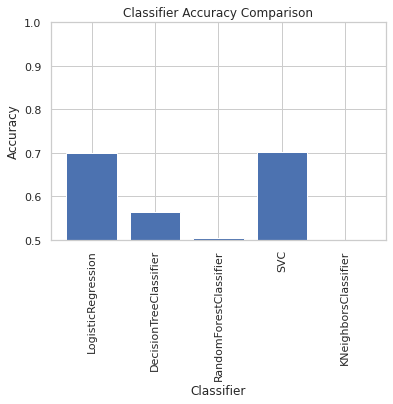

In [82]:
classifier_names = [result[0] for result in results]
best_scores = [result[1] for result in results]

# Plot the results
plt.bar(classifier_names, best_scores)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xticks(rotation=90)
plt.show()

In [79]:
# Create a voting classifier with the best hyperparameters found through grid search

lr_best = LogisticRegression(C=0.1, max_iter=100, solver='newton-cg')
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2)
rf_best = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200)
svm_best = SVC(C=10, kernel='rbf')
knn_best = KNeighborsClassifier(n_neighbors=10, weights='distance')

 

evc = VotingClassifier(estimators=[ ('lr' , lr_best), ('rf', rf_best), ('dt', dt_best), ('svm', svm_best),  ('knn', knn_best)], voting= 'hard', flatten_transform= True)

evc.fit(X_train, y_train)

 

# Evaluate the voting classifier on the test set

y_pred = evc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.45
F1 Score: 0.5217391304347826


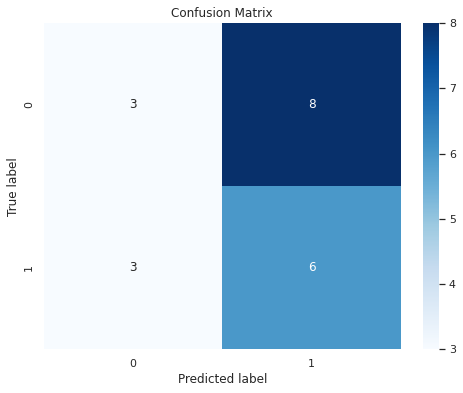

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
i

In [75]:
results

[('LogisticRegression', 0.7),
 ('DecisionTreeClassifier', 0.5644444444444444),
 ('RandomForestClassifier', 0.5044444444444445),
 ('SVC', 0.7022222222222222),
 ('KNeighborsClassifier', 0.4644444444444444)]

In [64]:
my_results = np.array(results)

In [68]:
print(my_results)

[['LogisticRegression' '0.7']
 ['DecisionTreeClassifier' '0.5644444444444444']
 ['RandomForestClassifier' '0.5044444444444445']
 ['SVC' '0.7022222222222222']
 ['KNeighborsClassifier' '0.4644444444444444']]


In [74]:
# Logistic Regression
lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)
print("Logistic Regression:")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_lr))
print("\n")

# Decision Tree
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)
print("Decision Tree:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_dt))
print("\n")

# Random Forest
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
print("Random Forest:")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rf))
print("\n")

# SVM
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
print("SVM:")
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Precision: ", precision_score(y_test, y_pred_svm))
print("Recall: ", recall_score(y_test, y_pred_svm))
print("F1 Score: ", f1_score(y_test, y_pred_svm))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_svm))
print("\n")

# KNN
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
print("KNN:")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_knn))
print("\n")

# Voting Classifier
evc.fit(X_train, y_train)
y_pred_voting = evc.predict(X_test)
print("Voting Classifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_voting))
print("Precision: ", precision_score(y_test, y_pred_voting))
print("Recall: ", recall_score(y_test, y_pred_voting))
print("F1 Score: ", f1_score(y_test, y_pred_voting))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_voting))
print("\n")

Logistic Regression:
Accuracy:  0.45
Precision:  0.42857142857142855
Recall:  0.6666666666666666
F1 Score:  0.5217391304347826
Confusion Matrix: 
[[3 8]
 [3 6]]


Decision Tree:
Accuracy:  0.55
Precision:  0.5
Recall:  0.8888888888888888
F1 Score:  0.64
Confusion Matrix: 
[[3 8]
 [1 8]]


Random Forest:
Accuracy:  0.4
Precision:  0.3333333333333333
Recall:  0.3333333333333333
F1 Score:  0.3333333333333333
Confusion Matrix: 
[[5 6]
 [6 3]]


SVM:
Accuracy:  0.3
Precision:  0.35294117647058826
Recall:  0.6666666666666666
F1 Score:  0.46153846153846156
Confusion Matrix: 
[[ 0 11]
 [ 3  6]]


KNN:
Accuracy:  0.4
Precision:  0.4
Recall:  0.6666666666666666
F1 Score:  0.5
Confusion Matrix: 
[[2 9]
 [3 6]]


Voting Classifier:
Accuracy:  0.45
Precision:  0.4166666666666667
Recall:  0.5555555555555556
F1 Score:  0.4761904761904762
Confusion Matrix: 
[[4 7]
 [4 5]]




In [ ]:
Ensemble learning - XGBoost 
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(X_train,y_train)
y_pred=model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

60.0


In [ ]:
f1_score (y_test, model_xg.predict(X_test), average = 'binary')

0.5

In [ ]:
confusion_matrix(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 3]
 [5 4]]


In [ ]:
# matrices for every algorithm -  loop

for i in list3:

  print('-------------------------------------' , i , '--------------------------------------------')
  print (classification_report(y_test, i.predict(X_test)))
  print ('Confusion Matrix:')
  cm = confusion_matrix(y_test, i.predict(X_test))
  print (cm)
  print()

------------------------------------- LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') --------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.43      0.67      0.52         9

    accuracy                           0.45        20
   macro avg       0.46      0.47      0.44        20
weighted avg       0.47      0.45      0.43        20

Confusion Matrix:
[[3 8]
 [3 6]]

------------------------------------- DecisionTreeClassifier(random_state=14) --------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20

Confusion Matrix:
[[6 5]
 [5 4]]

-----------

<Axes: >

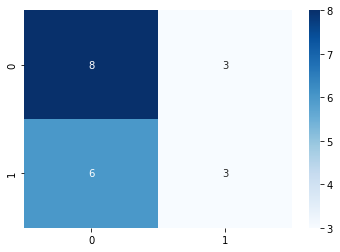

In [ ]:
# Confusion matrix for Best model - Random Forest Entropy
confusion_matrix(y_test, y_pred4)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues")


In [ ]:
#Visualizing performance with ROC 
def plot_roc (model, X_test, y_test):
  #calculate the fpr and tpr for all thresholds of the classification
  probabilities = model.predict_proba(np.array(X_test))
  predictions =probabilities
  fpr, tpr, threshold = roc_curve(y_test, predictions [:,1])
  roc_auc = auc (fpr, tpr)


  plt.title ('Receiver Operating Characteristic')
  plt.plot (fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend (loc= 'lower right')
  plt.plot ([0, 1], [0, 1], 'r--')
  plt.xlim ([0,1])
  plt.ylim ([0,1])
  plt.ylabel('True positive Rate')
  plt.xlabel ('False Positive Rate')
  plt.show()

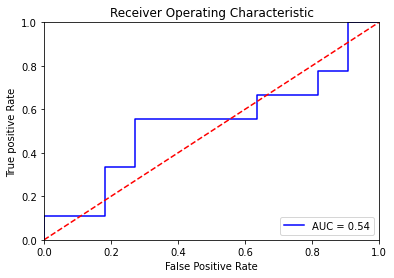

In [ ]:
plot_roc (model_xg, X_test, y_test)


--------------------------------------ROC FOR  logistic regression  + PCA--------------------------------------------


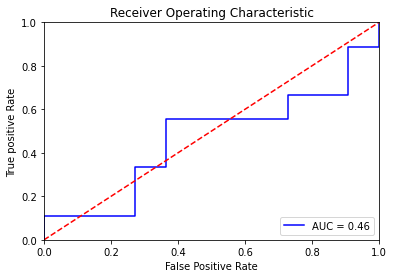



--------------------------------------ROC FOR  Decision tree  + PCA--------------------------------------------


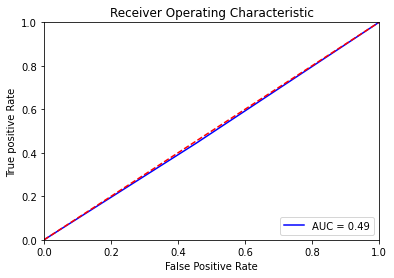



--------------------------------------ROC FOR  Random forest_info gain   + PCA--------------------------------------------


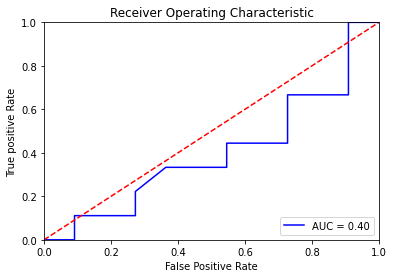



--------------------------------------ROC FOR  Random forest_entropy  + PCA--------------------------------------------


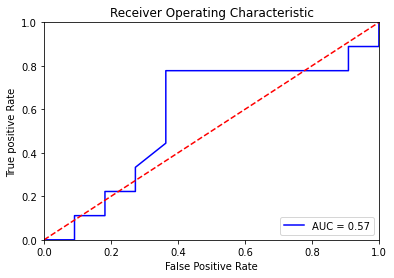



--------------------------------------ROC FOR  SVM  + PCA--------------------------------------------
roc not valid

--------------------------------------ROC FOR  KNN  + PCA--------------------------------------------


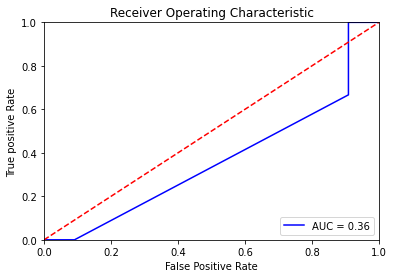

In [ ]:
for i in range (0, len(list3)):
  try:
     print()
     print ('--------------------------------------ROC FOR ', list1[i], ' + PCA--------------------------------------------')
     plot_roc(list3[i], X_test, np.array(y_test))
     print()
  except:
    print ('roc not valid')
    